In [13]:
import pandas as pd
import numpy as np

# Loading the dataset

In [14]:
stock_data = pd.read_csv('/kaggle/input/djiatable/upload_DJIA_table.csv')

# Data Pre-Processing

In [15]:
stock_data

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234
...,...,...,...,...,...,...,...
1984,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688
1985,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961
1986,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727
1987,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609


Describing the stock data

In [16]:
stock_data.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1989.000000,1989.000000,1989.000000,1989.000000,1.989000e+03,1989.000000
mean,13459.116048,13541.303173,13372.931728,13463.032255,1.628110e+08,13463.032255
std,3143.281634,3136.271725,3150.420934,3144.006996,9.392343e+07,3144.006996
min,6547.009766,6709.609863,6469.950195,6547.049805,8.410000e+06,6547.049805
25%,10907.339844,11000.980469,10824.759766,10913.379883,1.000000e+08,10913.379883
50%,13022.049805,13088.110352,12953.129883,13025.580078,1.351700e+08,13025.580078
75%,16477.699219,16550.070312,16392.769531,16478.410156,1.926000e+08,16478.410156
max,18315.060547,18351.359375,18272.560547,18312.390625,6.749200e+08,18312.390625


Setting the date column as equivalent to index

In [17]:
stock_data = stock_data.set_index(pd.DatetimeIndex(stock_data['Date'].values))

In [18]:
import matplotlib.pyplot as plt

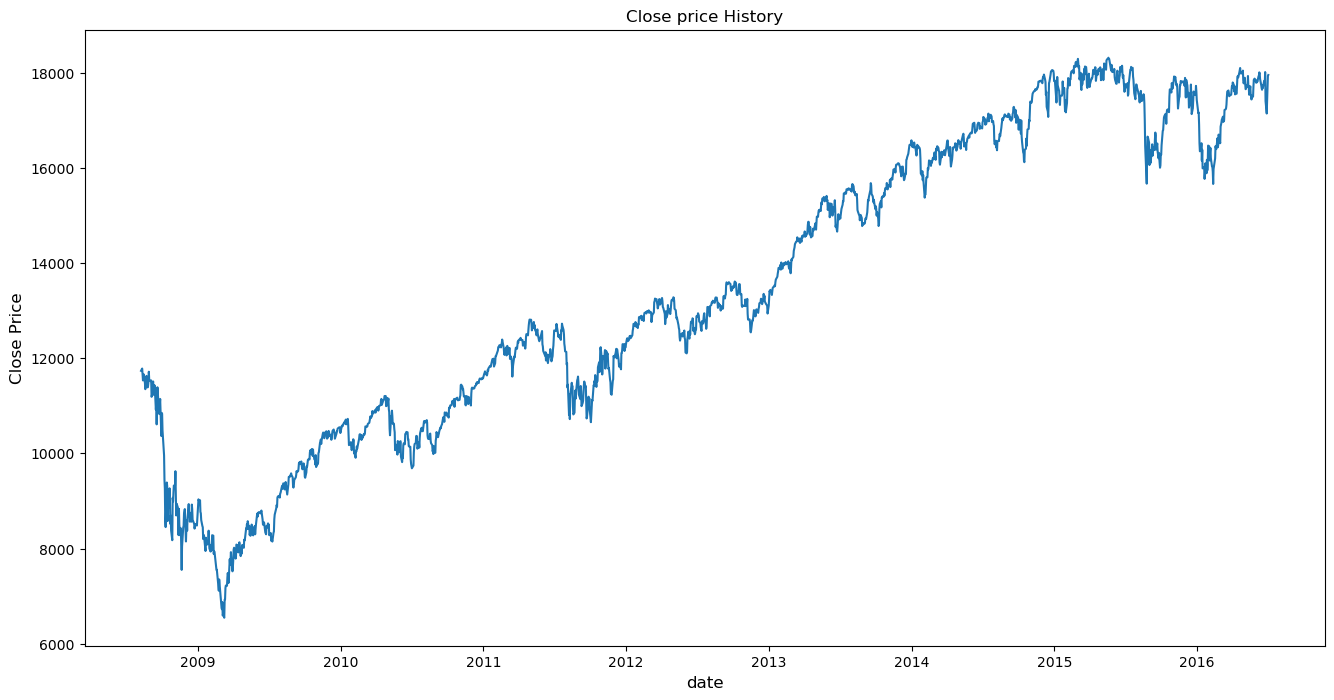

In [19]:
#visually show the close price
plt.figure(figsize=(16,8))
plt.title('Close price History', fontsize=12)
plt.plot(stock_data['Close'])
plt.xlabel('date', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.show()

The above figure shows the line chart for the close price. From the figure, it is evident that the close price is increased as the time increases.

The Simple Moving Average (SMA) is the most basic of moving averages to build. It is necessary to compute the average price throughout the selected time period. This mean is referred to as "moving" because it is shown on the chart in phases, bar by bar. A dynamic line emerges on the display when the average number changes.

In [20]:
#Create a function to calculate the Simple Moving Average(SMA)
def SMA(data, period = 30, column='Close'):
    return data[column].rolling(window=period).mean()

Storing the 20 day and 50 day SMA

In [21]:
#Create two new columns to store the 20day and 50 day SMA
stock_data['SMA20']=SMA(stock_data, 20)
stock_data['SMA50']=SMA(stock_data, 50)

In [22]:
stock_data

,Date,Open,High,Low,Close,Volume,Adj Close,SMA20,SMA50
2016-07-01,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,NaN,NaN
2016-06-30,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234,NaN,NaN
2016-06-29,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688,NaN,NaN
2016-06-28,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703,NaN,NaN
2016-06-27,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2008-08-14,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,11452.166455,10589.678008
2008-08-13,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,11457.128955,10646.512207
2008-08-12,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,11475.806445,10708.977402
2008-08-11,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,11503.387402,10763.951191


A new column named "signal" is established throughout this method. When the 20-period SMA crosses over both the 20-period and 50-period SMAs, the signal is labelled "1." If the 20-period SMA does not cross the 50-period SMA, the signal is labelled "0."

A new column, "position," is also included. It computes the price difference between the previous and current days, providing critical information on price change.

In [23]:
#Get the buy and sell signals
stock_data['Signal'] = np.where(stock_data['SMA20'] > stock_data['SMA50'],1,0)
stock_data['Position'] = stock_data['Signal'].diff()

The next step is to differentiate between buy and sell signals. A "position" value of 1 indicates that the short-term moving average has crossed above the long-term moving average, suggesting a buy signal. This pattern indicates a good market trend for starting a purchase activity.

In [24]:
stock_data['Buy'] = np.where(stock_data['Position'] == 1, stock_data['Close'], np.NaN)
stock_data['Sell'] = np.where(stock_data['Position'] == -1, stock_data['Close'], np.NaN)

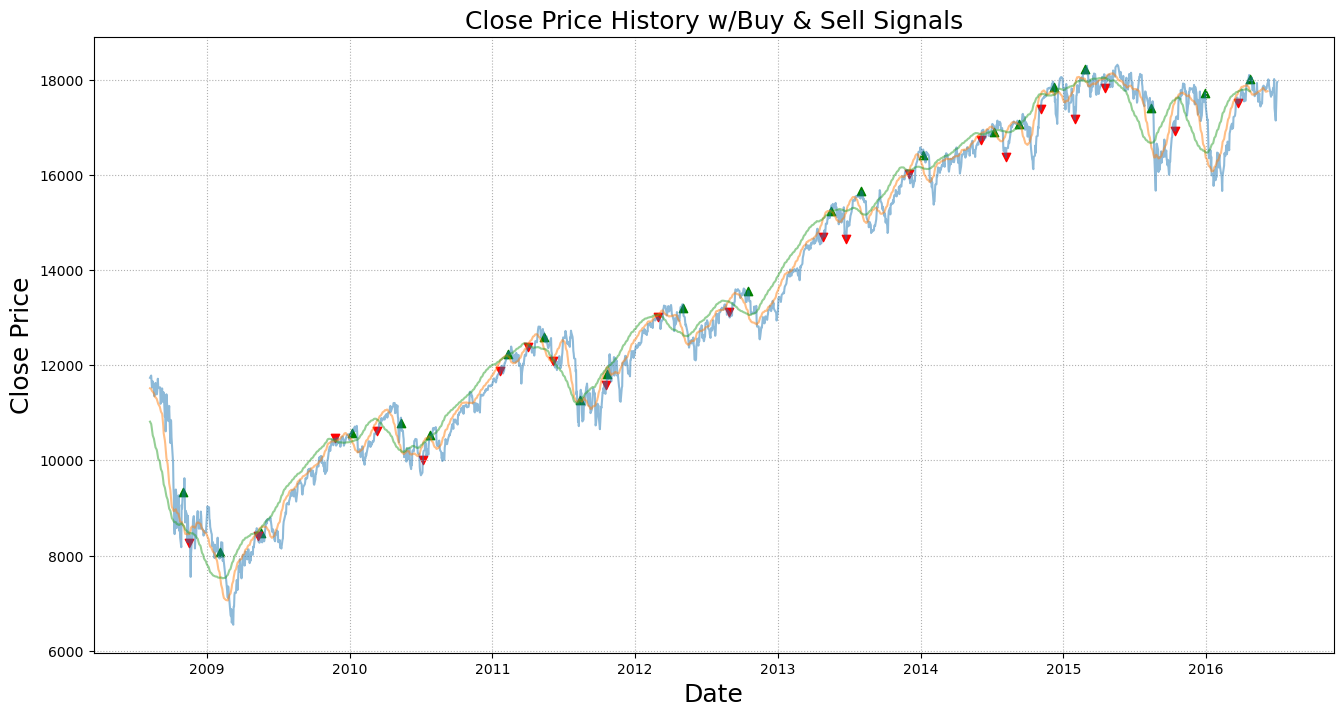

In [25]:
#Visually show the close price with the SMAs and buy & sell signals
plt.figure(figsize=(16,8))
plt.title('Close Price History w/Buy & Sell Signals', fontsize=18)
plt.plot(stock_data['Close'], alpha = 0.5, label='close')
plt.plot(stock_data['SMA20'], alpha = 0.5, label='SMA20')
plt.plot(stock_data['SMA50'], alpha = 0.5, label='SMA50')
plt.scatter(stock_data.index, stock_data['Buy'], alpha = 1, label='Buy Signal',marker = '^', color = 'green')
plt.scatter(stock_data.index, stock_data['Sell'], alpha = 1, label='Sell Signal',marker = 'v', color = 'red')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price', fontsize = 18)
plt.grid(linestyle=':')
plt.show()

From the above figure, it is evident that the green signals suggest excellent purchase chances in this context, whilst red signals indicate instances in which selling is suitable. The year 2008, in particular, stands out as a losing phase, with the green light positioned above the red signal. In comparison, the period from 2015 to 2016 seems to be quite profitable, with large earnings compared to prior years.

# Loading the another dataset for sentimental analysis

In [26]:
# Load the combined dataset
data = pd.read_csv("Combined_News_DJIA.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'Combined_News_DJIA.csv'

In [ ]:
# Load news data for sentiment analysis
news_data = pd.read_csv("RedditNews.csv")

Overview of the data

In [ ]:
print("Shape of the data:")
data.shape

In [ ]:
print("\nHead of the data:")
data.head()

In [ ]:
print("\nTail of the data:")
data.tail()

In [ ]:
print("\nSummary statistics:")
data.describe()

In [ ]:
print("\nMissing values:")
print(data.isnull().sum())

In [ ]:
# drop rows with missing values
data.dropna(inplace=True)

In [ ]:
# check for missing values again
print(data.isnull().sum().sum())

In [ ]:
import plotly.express as px

# Assuming 'df' is your DataFrame containing the target variable
# and the column name is 'Label'

# Count the occurrences of each label
label_counts = data['Label'].value_counts()

# Create a bar chart using Plotly
fig = px.bar(x=label_counts.index, y=label_counts.values, 
             labels={'x': 'Label', 'y': 'Count'}, title='Distribution of the target variable')

# Show the interactive plot
fig.show()

## Text Pre-Processing

### Tokenizing the text into individual words

In [ ]:
import nltk
import os

nltk.download('punkt')

In [ ]:
from nltk.tokenize import word_tokenize

# create a list of columns containing text
text_columns = [col for col in data.columns if col.startswith('Top')]

# tokenize the text in all columns and store the result in a new column with the same name + "_tokenized"
for col in text_columns:
    data[col + '_tokenized'] = data[col].apply(word_tokenize)

# show the first 5 rows of the new columns
print(data[[col + '_tokenized' for col in text_columns]].head())

### Converting all words to lowercase

In [ ]:
# Convert all words to lowercase
data[text_columns] = data[text_columns].apply(lambda x: x.str.lower())

### Stemming or lemmatizing the words

In [ ]:
import nltk
nltk.download('wordnet')

In [ ]:
import nltk
nltk.download('omw-1.4')

In [ ]:
# Lemmatizing the words
from nltk.stem import WordNetLemmatizer

def lemmatize_words(text):
    lemmatizer = WordNetLemmatizer()
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

data[text_columns] = data[text_columns].apply(lambda x: x.apply(lemmatize_words))

### Removing Stopwords

In [ ]:
import nltk
from nltk.corpus import stopwords

# Download the stopwords and punkt corpora from nltk
nltk.download('stopwords')
nltk.download('punkt')

def remove_stopwords(text):
    # Create a set of English stop words
    stop_words = set(stopwords.words("english"))
    
    # Tokenize the input text into words
    words = nltk.word_tokenize(text)
    
    # Convert words to lowercase and remove stop words
    words = [word.lower() for word in words if word.lower() not in stop_words]
    
    # Join the words back into a single string
    return " ".join(words)


# Loop through all columns in the dataframe
for col in data.columns:
    # Check if the column data type is object
    if data[col].dtype == 'object':
        # Apply the remove_stopwords function to the column if the value is a string
        data[col] = data[col].apply(lambda x: remove_stopwords(x) if type(x) == str else x)

### Removing Punctuation

In [ ]:
import string

# Define a function to remove punctuation from a string
def remove_punctuation(text):
    # Create a string of all ASCII punctuation characters
    punctuation = string.punctuation
    # Use translate method to remove all punctuation characters from the text
    text = text.translate(str.maketrans("", "", punctuation))
    return text

# Loop through all columns in the dataframe
for col in data.columns:
    # Check if the column data type is object (e.g. string)
    if data[col].dtype == 'object':
        # Apply the remove_punctuation function to each string value in the column
        data[col] = data[col].apply(lambda x: remove_punctuation(x) if type(x) == str else x)

### Removing Non-Texual Data

In [ ]:
import re

def removing_non_textual(text):
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"\d+", "", text)  # remove numbers
    text = re.sub(r"[^\w\s]", "", text)  # remove special characters
    return text

for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].apply(lambda x: removing_non_textual(x) if type(x) == str else x)

### Removing words that are unique to the corpus or dataset

In [ ]:
from nltk import FreqDist

def removing_corpus_specific_words(text, threshold):
    words = nltk.word_tokenize(text)
    fdist = FreqDist(words)
    stop_words = [word for word, count in fdist.items() if count > threshold]
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].apply(lambda x: removing_corpus_specific_words(x, 100) if type(x) == str else x)

# Feature Extraction

### Count-based methods, such as term frequency-inverse document frequency (TF-IDF)

In [ ]:
columns = ['Label','Top1_tokenized', 'Top2_tokenized', 'Top3_tokenized', 'Top4_tokenized', 'Top5_tokenized', 'Top6_tokenized', 'Top7_tokenized', 'Top8_tokenized', 'Top9_tokenized', 'Top10_tokenized', 'Top11_tokenized', 'Top12_tokenized', 'Top13_tokenized', 'Top14_tokenized', 'Top15_tokenized', 'Top16_tokenized', 'Top17_tokenized', 'Top18_tokenized', 'Top19_tokenized', 'Top20_tokenized', 'Top21_tokenized', 'Top22_tokenized', 'Top23_tokenized', 'Top24_tokenized', 'Top25_tokenized']
data = data[columns]

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

def tfidf_features(dataframe):
    tfidf = TfidfVectorizer(min_df=2)  # minimum document frequency to consider a word
    features = tfidf.fit_transform(dataframe)
    feature_names = tfidf.get_feature_names_out()
    return features, feature_names

# Apply TF-IDF to all columns with text data
for col in data.columns:
    if data[col].dtype == 'object':
        text = data[col].apply(str)  # convert pandas series to list of strings
        features, feature_names = tfidf_features(text)
        data_tfidf = pd.DataFrame(features.todense(), columns=feature_names)
        data = pd.concat([data, data_tfidf], axis=1)

In [ ]:
data.shape

In [ ]:
data = data.dropna(subset=["Label"])

# Model training and evaluation

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# extract the text data
text_data = data[['Top1_tokenized', 'Top2_tokenized', 'Top3_tokenized',           'Top4_tokenized', 'Top5_tokenized', 'Top6_tokenized', 'Top7_tokenized',           'Top8_tokenized', 'Top9_tokenized', 'Top10_tokenized',           'Top11_tokenized', 'Top12_tokenized', 'Top13_tokenized',           'Top14_tokenized', 'Top15_tokenized', 'Top16_tokenized',           'Top17_tokenized', 'Top18_tokenized', 'Top19_tokenized',           'Top20_tokenized', 'Top21_tokenized', 'Top22_tokenized',           'Top23_tokenized', 'Top24_tokenized', 'Top25_tokenized']]

# combine all the text data into a single string for each row
text_data = text_data.apply(lambda x: " ".join(str(x) for x in x), axis=1)

# perform count vectorization to convert text into numerical data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text_data)

# extract the target variable
y = data["Label"]

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [ ]:
train_data = X_train
train_labels = y_train
test_data = X_test
test_labels = y_test

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


# Define the models to be trained
models = [LogisticRegression(), SVC(), RandomForestClassifier(), GradientBoostingClassifier(), KNeighborsClassifier(), DecisionTreeClassifier()]
model_names = ["Logistic Regression", "Support Vector Classifier", "Random Forest", "Gradient Boosting", "K-Nearest Neighbors", "Decision Tree"]

results=[]
# Train each model and get predictions
for model, model_name in zip(models, model_names):
    model.fit(train_data, train_labels)
    predictions = model.predict(test_data)
    
    # Calculate evaluation metrics for each model
    accuracy = accuracy_score(test_labels, predictions)
    precision = precision_score(test_labels, predictions)
    recall = recall_score(test_labels, predictions)
    f1 = f1_score(test_labels, predictions)
    
    # Store the results of each model in the results list
    results.append((model_name, accuracy, precision, recall, f1))
    
# Print the results
for result in results:
    print("Model: {}\nAccuracy: {:.2f}%\nPrecision: {:.2f}%\nRecall: {:.2f}%\nF1 Score: {:.2f}%\n".format(result[0], result[1]*100, result[2]*100, result[3]*100, result[4]*100))